Step 1: Set Up Your Environment

In [3]:
!pip install numpy
!pip install opencv-python
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install keras


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.8 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.8 kB 393.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.8 kB 573.4 kB/s eta 0:00:01
   ----------- ----------------------

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\abira\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



Defaulting to user installation because normal site-packages is not writeable


Step 2: Load and Preprocess the Dataset

1. Load the Dataset:

Processing directory: C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_1-20240214T101432Z-001
Processing directory: C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_2-20240214T101433Z-001
Processing directory: C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Satge_3-20240214T101432Z-001
Processing directory: C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_4-20240214T101439Z-001
Processing directory: C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_5-20240214T101437Z-001
Failed to load image: C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_5-20240214T101437Z-001\Copy of Screenshot 202

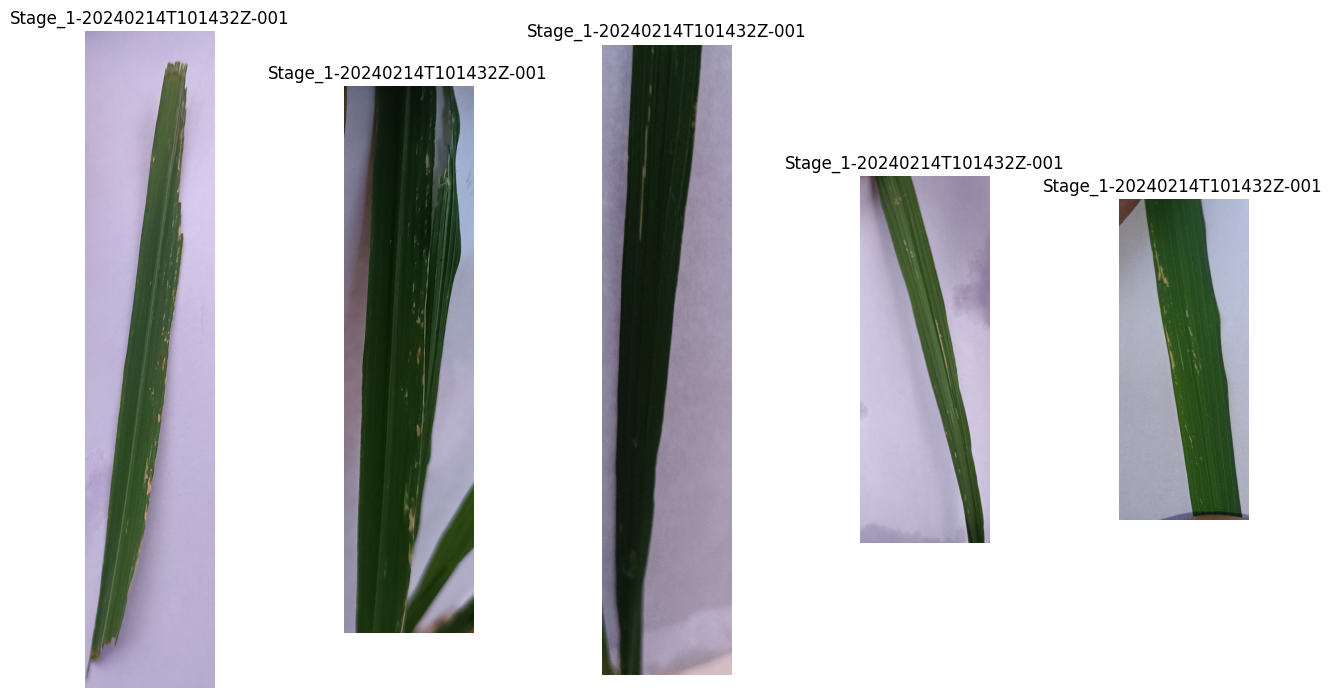

In [4]:
import os
import cv2
import numpy as np

# Path to the main directory containing subdirectories of images
main_dir = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset'

# Function to load and preprocess images
def load_images(main_dir):
    stages = [
        'Stage_1-20240214T101432Z-001', 
        'Stage_2-20240214T101433Z-001', 
        'Satge_3-20240214T101432Z-001', 
        'Stage_4-20240214T101439Z-001', 
        'Stage_5-20240214T101437Z-001'
    ]
    images = []
    labels = []

    for stage in stages:
        stage_dir = os.path.join(main_dir, stage)
        if os.path.isdir(stage_dir):
            print(f"Processing directory: {stage_dir}")
            for file_name in os.listdir(stage_dir):
                if file_name.endswith('.jpg') or file_name.endswith('.png'):
                    image_path = os.path.join(stage_dir, file_name)
                    image = cv2.imread(image_path)
                    if image is not None:
                        images.append(image)
                        labels.append(stage)
                    else:
                        print(f"Failed to load image: {image_path}")
    
    return images, labels

# Load images
images, labels = load_images(main_dir)

# Display the number of loaded images
print(f"Total images loaded: {len(images)}")

# Display some sample information about the images
for i in range(5):
    print(f"Image {i + 1}:")
    print(f"  - Label: {labels[i]}")
    print(f"  - Shape: {images[i].shape}")

# Display some sample images
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # Increase the figure size
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    plt.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=1)  # Increase the horizontal space
plt.show()


In [5]:
import os
import cv2
import shutil

# Path to the main directory containing subdirectories of images
main_dir = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset'

# Path to the directory where the images will be copied for preprocessing
preprocess_dir = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images'

# Function to load and store images in a new directory for preprocessing
def load_and_store_images(main_dir, preprocess_dir):
    stages = [
        'Stage_1-20240214T101432Z-001', 
        'Stage_2-20240214T101433Z-001', 
        'Satge_3-20240214T101432Z-001', 
        'Stage_4-20240214T101439Z-001', 
        'Stage_5-20240214T101437Z-001'
    ]

    # Create the preprocessing directory if it does not exist
    if not os.path.exists(preprocess_dir):
        os.makedirs(preprocess_dir)

    for stage in stages:
        stage_dir = os.path.join(main_dir, stage)

        if os.path.isdir(stage_dir):
            print(f"Processing directory: {stage_dir}")
            for file_name in os.listdir(stage_dir):
                if file_name.endswith('.jpg') or file_name.endswith('.png'):
                    image_path = os.path.join(stage_dir, file_name)
                    new_image_path = os.path.join(preprocess_dir, f"{stage}_{file_name}")
                    
                    # Copy the image to the new directory
                    shutil.copy(image_path, new_image_path)
                    print(f"Copied {image_path} to {new_image_path}")

# Call the function to load and store images
load_and_store_images(main_dir, preprocess_dir)


Processing directory: C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_1-20240214T101432Z-001
Copied C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_1-20240214T101432Z-001\Copy of 1707268804077.jpg to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Stage_1-20240214T101432Z-001_Copy of 1707268804077.jpg
Copied C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_1-20240214T101432Z-001\Copy of 1707268804090.jpg to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Stage_1-20240214T101432Z-001_Copy of 1707268804090.jpg
Copied C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_1-20240214T101432Z-001\Copy of 1707268804159.jpg

2. Preprocess the Images:

Convert images to grayscale.

In [6]:
import os
import cv2

# Path to the directory where the images are stored for preprocessing
preprocess_dir = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images'

# Function to convert images to grayscale
def convert_images_to_grayscale(preprocess_dir):
    if not os.path.exists(preprocess_dir):
        print(f"Directory does not exist: {preprocess_dir}")
        return
    
    files_processed = 0
    files_failed = 0
    
    for file_name in os.listdir(preprocess_dir):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            image_path = os.path.join(preprocess_dir, file_name)
            image = cv2.imread(image_path)
            
            if image is not None:
                # Convert the image to grayscale
                gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                
                # Save the grayscale image back to the same path
                cv2.imwrite(image_path, gray_image)
                files_processed += 1
                print(f"Converted {image_path} to grayscale")
            else:
                files_failed += 1
                print(f"Failed to load image: {image_path}")
    
    print(f"Total files processed: {files_processed}")
    print(f"Total files failed to process: {files_failed}")

# Call the function to convert images to grayscale
convert_images_to_grayscale(preprocess_dir)


Converted C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg to grayscale
Converted C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg to grayscale
Converted C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_115734.jpg to grayscale
Converted C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_130544.jpg to grayscale
Converted C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071418.jpg to grayscale
Converted C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after

Apply histogram equalization.

In [7]:
import os
import cv2

# Path to the directory where the images are stored for preprocessing
preprocess_dir = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images'

# Function to apply histogram equalization to grayscale images
def apply_histogram_equalization(preprocess_dir):
    if not os.path.exists(preprocess_dir):
        print(f"Directory does not exist: {preprocess_dir}")
        return
    
    files_processed = 0
    files_failed = 0
    
    for file_name in os.listdir(preprocess_dir):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            image_path = os.path.join(preprocess_dir, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            if image is not None:
                # Apply histogram equalization
                equalized_image = cv2.equalizeHist(image)
                
                # Save the equalized image back to the same path
                cv2.imwrite(image_path, equalized_image)
                files_processed += 1
                print(f"Applied histogram equalization to {image_path}")
            else:
                files_failed += 1
                print(f"Failed to load image: {image_path}")
    
    print(f"Total files processed: {files_processed}")
    print(f"Total files failed to process: {files_failed}")

# Call the function to apply histogram equalization to grayscale images
apply_histogram_equalization(preprocess_dir)


Applied histogram equalization to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg
Applied histogram equalization to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg
Applied histogram equalization to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_115734.jpg
Applied histogram equalization to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_130544.jpg
Applied histogram equalization to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071418.jpg
Applied histogram equaliz

Apply Gaussian blur.

In [8]:
import os
import cv2

# Path to the directory where the images are stored for preprocessing
preprocess_dir = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images'

# Function to apply Gaussian blur to images
def apply_gaussian_blur(preprocess_dir, kernel_size=(5, 5), sigma=0):
    if not os.path.exists(preprocess_dir):
        print(f"Directory does not exist: {preprocess_dir}")
        return
    
    files_processed = 0
    files_failed = 0
    
    for file_name in os.listdir(preprocess_dir):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            image_path = os.path.join(preprocess_dir, file_name)
            image = cv2.imread(image_path)
            
            if image is not None:
                # Apply Gaussian blur
                blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)
                
                # Save the blurred image back to the same path
                cv2.imwrite(image_path, blurred_image)
                files_processed += 1
                print(f"Applied Gaussian blur to {image_path}")
            else:
                files_failed += 1
                print(f"Failed to load image: {image_path}")
    
    print(f"Total files processed: {files_processed}")
    print(f"Total files failed to process: {files_failed}")

# Call the function to apply Gaussian blur to images
apply_gaussian_blur(preprocess_dir)


Applied Gaussian blur to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg
Applied Gaussian blur to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg
Applied Gaussian blur to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_115734.jpg
Applied Gaussian blur to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_130544.jpg
Applied Gaussian blur to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071418.jpg
Applied Gaussian blur to C:\Users\abira\OneDrive\6th sem\19CSE435 COMP

Apply adaptive thresholding.

In [9]:
import os
import cv2

# Path to the directory where the images are stored for preprocessing
preprocess_dir = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images'

# Function to apply adaptive thresholding to images
def apply_adaptive_thresholding(preprocess_dir):
    if not os.path.exists(preprocess_dir):
        print(f"Directory does not exist: {preprocess_dir}")
        return
    
    files_processed = 0
    files_failed = 0
    
    for file_name in os.listdir(preprocess_dir):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            image_path = os.path.join(preprocess_dir, file_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            if image is not None:
                # Apply adaptive thresholding
                thresholded_image = cv2.adaptiveThreshold(
                    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
                
                # Save the thresholded image back to the same path
                cv2.imwrite(image_path, thresholded_image)
                files_processed += 1
                print(f"Applied adaptive thresholding to {image_path}")
            else:
                files_failed += 1
                print(f"Failed to load image: {image_path}")
    
    print(f"Total files processed: {files_processed}")
    print(f"Total files failed to process: {files_failed}")

# Call the function to apply adaptive thresholding to images
apply_adaptive_thresholding(preprocess_dir)


Applied adaptive thresholding to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg
Applied adaptive thresholding to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg
Applied adaptive thresholding to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_115734.jpg
Applied adaptive thresholding to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240205_130544.jpg
Applied adaptive thresholding to C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images\Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071418.jpg
Applied adaptive thresholding 

Perform morphological operations.

In [5]:
import cv2
import os

def apply_adaptive_threshold(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Loop through each file in the folder
    for file_name in files:
        # Read the image
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Check if the image was loaded successfully
        if image is None:
            print(f'Error loading image: {image_path}')
            continue  # Skip to the next image
        
        # Apply adaptive thresholding
        adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        
        # Save the image
        output_folder = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Threshold'
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, adaptive_thresh)
        
        print(f'Applied adaptive thresholding to: {file_name}')

# Call the function with your folder path
folder_path = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images'
apply_adaptive_threshold(folder_path)


Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_115734.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_130544.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071418.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071639.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071821.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071901.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_072908.jpg
Applied adaptive thresholding to: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_073611.jpg
Applied adaptive thresholding to: Satge_3-20240214

Step 3: Segment the Yellow Spots

1. Segment Yellow Spots:

Use color segmentation in the HSV color space to identify yellow regions.

In [6]:
import cv2
import numpy as np
import os

def apply_color_segmentation(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Loop through each file in the folder
    for file_name in files:
        # Read the image
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        
        # Convert the image to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        # Define the lower and upper bounds for yellow in HSV
        lower_yellow = np.array([20, 100, 100])
        upper_yellow = np.array([30, 255, 255])
        
        # Threshold the HSV image to get only yellow regions
        yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
        
        # Apply the mask to the original image
        yellow_segmented_image = cv2.bitwise_and(image, image, mask=yellow_mask)
        
        # Save the segmented image
        output_folder = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Yellow'
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, yellow_segmented_image)
        
        print(f'Applied color segmentation to identify yellow regions in: {file_name}')

# Call the function with your folder path
folder_path = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Threshold'
apply_color_segmentation(folder_path)


Applied color segmentation to identify yellow regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg
Applied color segmentation to identify yellow regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg
Applied color segmentation to identify yellow regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_115734.jpg
Applied color segmentation to identify yellow regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_130544.jpg
Applied color segmentation to identify yellow regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071418.jpg
Applied color segmentation to identify yellow regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071639.jpg
Applied color segmentation to identify yellow regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071821.jpg
Applied color segmentation to identify yellow regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071901.jpg
Applied color segmentation to identify yellow re

Create masks for the segmented regions.

In [7]:
import cv2
import os

def create_masks_for_segmented_regions(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Loop through each file in the folder
    for file_name in files:
        # Read the segmented image
        image_path = os.path.join(folder_path, file_name)
        segmented_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Threshold the segmented image to get the mask
        _, mask = cv2.threshold(segmented_image, 1, 255, cv2.THRESH_BINARY)
        
        # Save the mask image
        output_folder = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks'
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, mask)
        
        print(f'Created mask for segmented regions in: {file_name}')

# Call the function with your folder path
folder_path = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Threshold'
create_masks_for_segmented_regions(folder_path)


Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_115734.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_130544.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071418.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071639.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071821.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_071901.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_072908.jpg
Created mask for segmented regions in: Satge_3-20240214T101432Z-001_Copy of IMG_20240206_073611.jpg


Step 4: Extract Features

1. *Extract Features from Segmented Regions*:

Compute features such as area, perimeter, and intensity of the yellow spots.

In [8]:
import cv2
import numpy as np
import os

def compute_features(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Loop through each file in the folder
    for file_name in files:
        # Read the mask image
        image_path = os.path.join(folder_path, file_name)
        mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Find contours in the mask image
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Loop through each contour
        for contour in contours:
            # Compute area
            area = cv2.contourArea(contour)
            
            # Compute perimeter
            perimeter = cv2.arcLength(contour, True)
            
            # Compute intensity
            mean_intensity = cv2.mean(mask, mask=mask)[0]
            
            # Print the computed features
            print(f'Image: {file_name}, Area: {area}, Perimeter: {perimeter}, Mean Intensity: {mean_intensity}')

# Call the function with your folder path
folder_path = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks'
compute_features(folder_path)


Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg, Area: 0.0, Perimeter: 0.0, Mean Intensity: 230.9127118830565
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg, Area: 0.0, Perimeter: 0.0, Mean Intensity: 230.9127118830565
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg, Area: 0.0, Perimeter: 0.0, Mean Intensity: 230.9127118830565
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg, Area: 0.0, Perimeter: 0.0, Mean Intensity: 230.9127118830565
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg, Area: 839590.0, Perimeter: 6067.919162273407, Mean Intensity: 230.9127118830565
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg, Area: 0.0, Perimeter: 2.0, Mean Intensity: 233.95399938697807
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg, Area: 0.0, Perimeter: 0.0, Mean Intensity: 233.95399938697807
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg, 

use texture features like GLCM (Gray-Level Co-occurrence Matrix)

In [9]:
!pip install mahotas


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.7 MB 1.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.7 MB 983.0 kB/s eta 0:00:02
   --- ------------------------------------ 0.2/1.7 MB 1.0 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 958.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.7 MB 850.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 862.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.7 MB 842.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 787.7 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 781.9 kB/s eta 0:00:02
   -----

In [10]:
import cv2
import os
import mahotas as mh
import numpy as np

def compute_texture_features(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    
    # Loop through each file in the folder
    for file_name in files:
        # Read the mask image
        image_path = os.path.join(folder_path, file_name)
        mask = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
        # Compute GLCM
        glcm = mh.features.haralick(mask.astype(np.uint8)).mean(axis=0)
        
        # Print the GLCM features
        print(f'Image: {file_name}, GLCM Features: {glcm}')

# Call the function with your folder path
folder_path = r'C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks'
compute_texture_features(folder_path)


Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_112752.jpg, GLCM Features: [ 9.11382645e-02  1.53432423e+04  3.00363898e-01  1.09650781e+04
  4.60282791e-01  3.98036229e+02  2.85170702e+04  3.55164291e+00
  4.69730286e+00  7.03392894e-04  2.90283572e+00 -3.46557219e-02
  3.76520889e-01]
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_114009.jpg, GLCM Features: [ 1.15220447e-01  1.36168025e+04  3.24756344e-01  1.00829180e+04
  4.98420604e-01  4.10011248e+02  2.67148695e+04  3.41908936e+00
  4.48848403e+00  7.89322705e-04  2.79721631e+00 -3.80302250e-02
  3.90502580e-01]
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_115734.jpg, GLCM Features: [ 1.26428313e-01  1.29940238e+04  2.97293624e-01  9.24571766e+03
  5.09529605e-01  4.20491483e+02  2.39888469e+04  3.33523817e+00
  4.38310750e+00  8.17298076e-04  2.76240270e+00 -3.34191776e-02
  3.63538578e-01]
Image: Satge_3-20240214T101432Z-001_Copy of IMG_20240205_130544.jpg, GLCM Features: [ 8.28732756e-02  1.70486

In [3]:
import os
import re
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        # Read the image
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize image to a fixed size
            img = img.flatten()  # Flatten the image to 1D array
            images.append(img)
            labels.append(label)
    print(f"Loaded {len(images)} images from {folder_path} with label {label}.")
    return images, labels

def load_images_and_labels(train_folder_path):
    images = []
    labels = []
    # Iterate over subfolders in the training folder
    for subdir in os.listdir(train_folder_path):
        subdir_path = os.path.join(train_folder_path, subdir)
        if os.path.isdir(subdir_path):
            # Extract stage number from subdir name
            stage_number = None
            match = re.search(r'\d+', subdir)
            if match:
                stage_number = int(match.group())
            else:
                stage_number = 1  # Default to 1 if no stage number found
            # Load images from subfolder
            sub_images, sub_labels = load_images_from_folder(subdir_path, stage_number)
            images.extend(sub_images)
            labels.extend(sub_labels)
    return np.array(images), np.array(labels)

def create_and_train_svm_model(images, labels, test_images, test_labels):
    # Feature scaling
    scaler = StandardScaler()
    images = scaler.fit_transform(images)
    test_images = scaler.transform(test_images)
    
    # Create an SVM classifier
    svm_model = SVC(kernel='linear', random_state=42)
    
    # Cross-validation to evaluate the model
    print("Performing cross-validation...")
    scores = cross_val_score(svm_model, images, labels, cv=5)
    print(f"Cross-validation accuracy scores: {scores}")
    print(f"Mean cross-validation accuracy: {scores.mean() * 100:.2f}%")
    
    # Train the SVM model
    print("Training the SVM model...")
    svm_model.fit(images, labels)
    print("Model training completed.")
    
    # Make predictions on the test set
    y_pred = svm_model.predict(test_images)
    
    # Calculate and print the accuracy
    accuracy = accuracy_score(test_labels, y_pred)
    print(f"Model accuracy on test set: {accuracy * 100:.2f}%")
    
    return svm_model

# Paths to the training and testing folders
train_folder_path = r"C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset"
test_folder_path = r"C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks"

# Load training images and labels
print("Loading training images and labels...")
train_images, train_labels = load_images_and_labels(train_folder_path)
print(f"Loaded {len(train_images)} training images.")

# Load testing images and labels (assuming all test images are diseased)
print("Loading testing images and labels...")
test_images, test_labels = load_images_from_folder(test_folder_path, label=1)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(f"Loaded {len(test_images)} testing images.")

# Create and train the SVM model
svm_model = create_and_train_svm_model(train_images, train_labels, test_images, test_labels)


Loading training images and labels...
Loaded 16 images from C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Satge_3-20240214T101432Z-001 with label 3.
Loaded 12 images from C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_1-20240214T101432Z-001 with label 1.
Loaded 11 images from C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_2-20240214T101433Z-001 with label 2.
Loaded 12 images from C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_4-20240214T101439Z-001 with label 4.
Loaded 8 images from C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Dataset References\Image\Dataset\Stage_5-20240214T101437Z-001 with label 5.
Loaded 59 training images.
Loading testing images and labels...
Loaded 57 imag

In [4]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def load_images_and_labels(folder_path):
    images = []
    labels = []
    
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            # Read the image
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize image to a fixed size
                img = img.flatten()  # Flatten the image to 1D array
                images.append(img)
                # Assuming diseased leaves are labeled with 1
                labels.append(1)
    
    print(f"Loaded {len(images)} images.")
    return np.array(images), np.array(labels)

def create_and_train_rf_model(images, labels):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")
    
    # Create a Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the Random Forest model
    print("Training the Random Forest model...")
    rf_model.fit(X_train, y_train)
    print("Model training completed.")
    
    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)
    
    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy: {accuracy * 100:.2f}%")
    
    return rf_model

# Path to the folder containing images
folder_path = r"C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks"

# Load images and labels
images, labels = load_images_and_labels(folder_path)

# Create and train the Random Forest model
rf_model = create_and_train_rf_model(images, labels)


Loaded 57 images.
Training set size: 45
Testing set size: 12
Training the Random Forest model...
Model training completed.
Model accuracy: 100.00%


In [6]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def load_images_and_labels(folder_path, label):
    images = []
    labels = []
    
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            # Read the image
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize image to a fixed size
                img = img.flatten()  # Flatten the image to 1D array
                images.append(img)
                labels.append(label)
    
    print(f"Loaded {len(images)} images from {folder_path} with label {label}.")
    return np.array(images), np.array(labels)

def extract_features(images):
    # This function can be modified to extract more complex features
    print("Extracting features from images...")
    features = images  # Placeholder: using raw pixel values as features
    print(f"Extracted features shape: {features.shape}")
    return features

def create_and_train_rf_model(features, labels):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")
    
    # Create a Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the Random Forest model
    print("Training the Random Forest model...")
    rf_model.fit(X_train, y_train)
    print("Model training completed.")
    
    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)
    
    # Calculate and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy: {accuracy * 100:.2f}%")
    
    return rf_model

# Path to the folder containing diseased images
diseased_folder_path = r"C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks"

# Path to the folder containing healthy images
healthy_folder_path = r"C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Healthy_Images"

# Load images and labels for both classes
diseased_images, diseased_labels = load_images_and_labels(diseased_folder_path, label=1)
healthy_images, healthy_labels = load_images_and_labels(healthy_folder_path, label=0)

# Combine both classes
images = np.concatenate((diseased_images, healthy_images), axis=0)
labels = np.concatenate((diseased_labels, healthy_labels), axis=0)

# Extract features
features = extract_features(images)

# Create and train the Random Forest model
rf_model = create_and_train_rf_model(features, labels)

Loaded 57 images from C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks with label 1.
Loaded 17 images from C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Healthy_Images with label 0.
Extracting features from images...
Extracted features shape: (74, 49152)
Training set size: 59
Testing set size: 15
Training the Random Forest model...
Model training completed.
Model accuracy: 100.00%


In [8]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def load_images_and_labels(folder_path, label):
    images = []
    labels = []
    
    for subdir, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            # Read the image
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize image to a fixed size
                img = img.flatten()  # Flatten the image to 1D array
                images.append(img)
                labels.append(label)
    
    print(f"Loaded {len(images)} images from {folder_path} with label {label}.")
    return np.array(images), np.array(labels)

def extract_features(images):
    # This function can be modified to extract more complex features
    print("Extracting features from images...")
    features = images  # Placeholder: using raw pixel values as features
    print(f"Extracted features shape: {features.shape}")
    return features

# Path to the folder containing diseased images
diseased_folder_path = r"C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks"

# Load diseased images and labels
diseased_images, diseased_labels = load_images_and_labels(diseased_folder_path, label=1)

# Extract features
features = extract_features(diseased_images)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, diseased_labels, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")


Loaded 57 images from C:\Users\abira\OneDrive\6th sem\19CSE435 COMPUTER VISION\Project\after midterm\Preprocessing_Images_Masks with label 1.
Extracting features from images...
Extracted features shape: (57, 49152)
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Model accuracy: 100.00%
